In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#%matplotlib widget

In [4]:
# This function defines the test statistic for the counting experiment. 
# There are some 
def q_s(s,b,k):
    
    mask_k_zero = (k==0)
    mask_k_lt_b = (k<=b) & np.invert(mask_k_zero)
    mask_k_gt_b = (k>b) & np.invert(mask_k_zero)
    
    output = np.zeros(len(k))
    if s+b==0:
        return output
    
    k_zero = k[mask_k_zero]
    output[mask_k_zero] = 2 * (s)
    
    k_lt_b = k[mask_k_lt_b]
    output[mask_k_lt_b] = 2 * (s - k_lt_b*(np.log(s+b) - np.log(b)))

    k_gt_b = k[mask_k_gt_b]
    output[mask_k_gt_b] = 2 * (s  - (k_gt_b - b) - \
                                          k_gt_b*( np.log(s+b) - np.log(k_gt_b) ) )

    return output


def q_s2(s,b,k):
    
    s_hat = k-b
    
    if s_hat<s:
        return 0
    else:
        return 2 * (s  - (k - b) - k*( np.log(s+b) - np.log(k)))

/collab/usr/global/tools/jupyter/nb-2020-05-11/venvs/toss-python/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


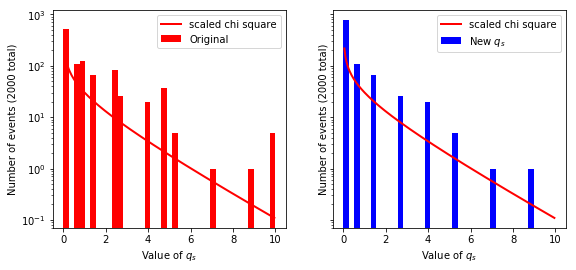

In [5]:
_,ax = plt.subplots(1,2,figsize=(9.2,4), sharey=True)

lamda_test = 5
bck = 0
test1 = np.random.poisson(lam=(lamda_test+bck),size=1000)
qtest1 = q_s(lamda_test,bck,test1)
qtest2 = np.array([q_s2(lamda_test,bck,k_) for k_ in test1])

ax[0].hist(qtest1,bins=np.linspace(0.,10.,40),log=True,color='r',label='Original')
ax[0].set(xlabel=r'Value of $q_s$', ylabel='Number of events (2000 total)')
ax[1].hist(qtest2,bins=np.linspace(0.,10.,40),log=True,color='b',label=r'New $q_s$')
ax[1].set(xlabel=r'Value of $q_s$', ylabel='Number of events (2000 total)')

x = np.arange(0, 10, .05)
[a.plot(x, 0.5*stats.chi2.pdf(x, df=1)*1000/40*10, color='r', lw=2, label='scaled chi square') for a in ax]
[a.legend() for a in ax]


[Text(0.5, 1.0, 'new construction')]

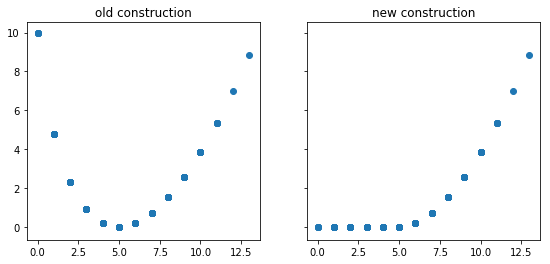

In [6]:
_,ax = plt.subplots(1,2,figsize=(9.2,4), sharey=True)
ax[0].scatter(test1,qtest1)
ax[0].set(title='old construction')
ax[1].scatter(test1,qtest2)
ax[1].set(title='new construction')

In [7]:
num_hypotheses = 250

hypotheses = np.linspace(0.,30,num_hypotheses)
limits_prob = np.zeros(num_hypotheses)
limits_90 = np.zeros(num_hypotheses)

limits_prob_np = np.zeros(num_hypotheses)
limits_95_np = np.zeros(num_hypotheses)

num_sim = 100000
for i in range(num_hypotheses):
    if i % 50 == 0:
        print(i)
    hyp = hypotheses[i]
    
    test = np.random.poisson(lam=hyp,size=num_sim)
    qtest = q_s(hyp,0.,test)
    qtest2 = np.array([q_s2(hyp,0,k_) for k_ in test])

    limits_prob[i] = sum(qtest>2.71)/num_sim
    limits_90[i] = np.quantile(qtest,0.90)
    
    limits_prob_np[i] = sum(qtest2>1.64)/num_sim
    limits_95_np[i] = np.quantile(qtest2,0.95)

0


/collab/usr/global/tools/jupyter/nb-2020-05-11/venvs/toss-python/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/collab/usr/global/tools/jupyter/nb-2020-05-11/venvs/toss-python/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/collab/usr/global/tools/jupyter/nb-2020-05-11/venvs/toss-python/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/usr/tce/packages/python/python-3.7.2/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/collab/usr/global/tools/jupyter/nb-2020-05-11/venvs/toss-python/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


50
100
150
200


[(0, 0.4), (0, 10), Text(0.5, 0, 'Signal hypothesis (num counts)')]

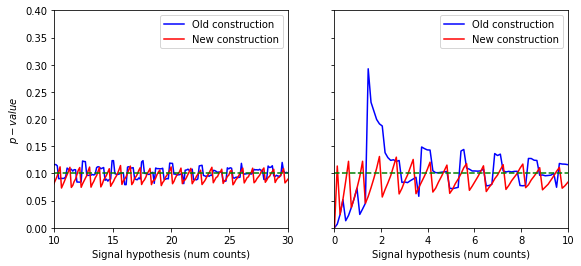

In [8]:
_,ax = plt.subplots(1,2,figsize=(9.2,4), sharey=True)

ax[0].plot(hypotheses,limits_prob,'b',label='Old construction')
ax[0].plot(hypotheses,limits_prob_np,'r',label='New construction')
ax[0].plot(hypotheses,hypotheses*0+0.1,'g--')
ax[0].legend()
ax[0].set(xlim=(10,30),ylim=(0,0.4),xlabel='Signal hypothesis (num counts)', ylabel=r'$p-value$')

ax[1].plot(hypotheses,limits_prob,'b',label='Old construction')
ax[1].plot(hypotheses,limits_prob_np,'r',label='New construction')
ax[1].plot(hypotheses,hypotheses*0+0.1,'g--')
ax[1].legend()
ax[1].set(xlim=(0,10),ylim=(0,0.4),xlabel='Signal hypothesis (num counts)')

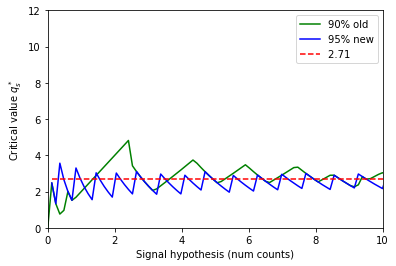

In [9]:
_,ax = plt.subplots()
ax.plot(hypotheses,limits_90,'g',label='90% old')
plt.plot(hypotheses,limits_95_np,'b',label='95% new')
plt.plot(hypotheses,limits_95_np*0+2.71,'r--',label='2.71 ')

ax.set(xlim=(0.,10.), ylim=(0.,12.), xlabel='Signal hypothesis (num counts)',ylabel=r'Critical value $q_s^*$')
ax.legend()